In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\Asus\Desktop\datasets\Iris.csv')

In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.drop(columns = 'Id', inplace = True)

In [8]:
df.isnull().values.any()

False

#### Looks like there are no missing values!

In [9]:
df.describe(include = "all")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [10]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

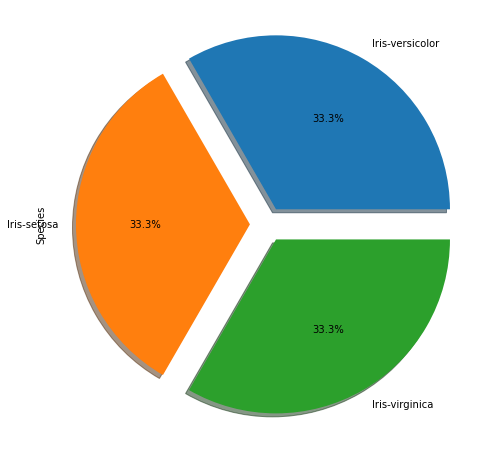

In [78]:
df.Species.value_counts().plot.pie(explode = [0.1,0.1,0.1], autopct = '%1.1f%%', shadow = True, figsize = (10,8))
plt.show()

#### This dataset is balanced as the 3 species are equal in number.

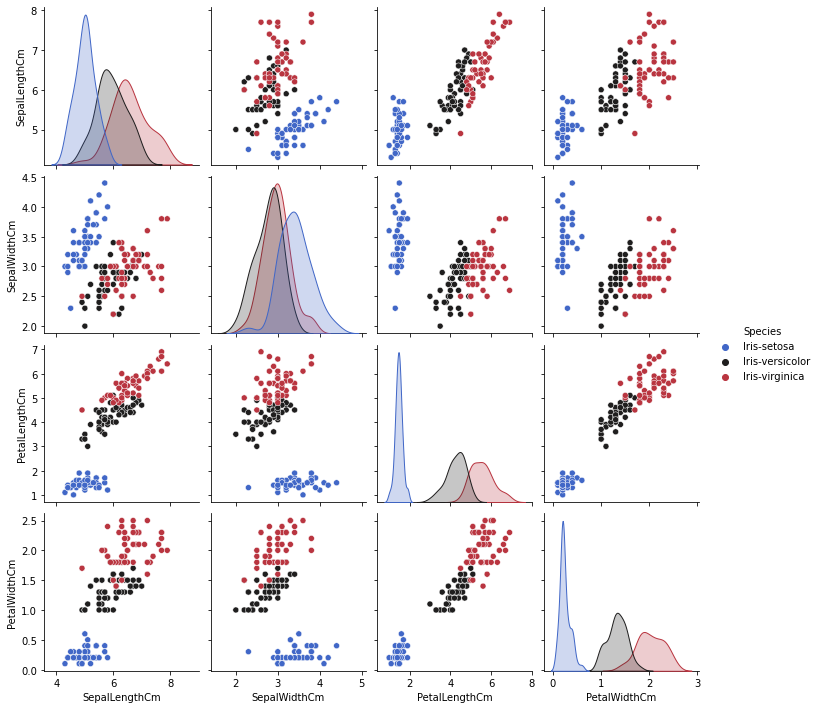

In [12]:
sns.pairplot(df, hue = 'Species', palette = 'icefire')

1. Iris Setosa seems to be more distinguishable than the other two species.
2. Iris Versicolor and Iris virginica seem to have very close values.


### Sepal Width vs Sepal Length

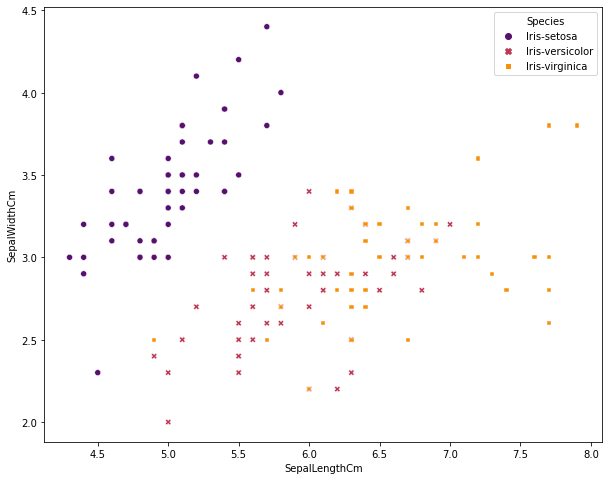

In [80]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = df, hue = 'Species', style = 'Species', palette = 'inferno')
plt.show()

#### Iris-setosa seems to be more distinguishable than the other two species.

### Comparison of all features

In [19]:
iris_setosa = df.loc[df['Species'] == 'Iris-setosa']
iris_versicolor = df.loc[df['Species'] == 'Iris-versicolor']
iris_virginica = df.loc[df['Species'] == 'Iris-virginica']

<AxesSubplot:title={'center':'Iris-virginica'}>

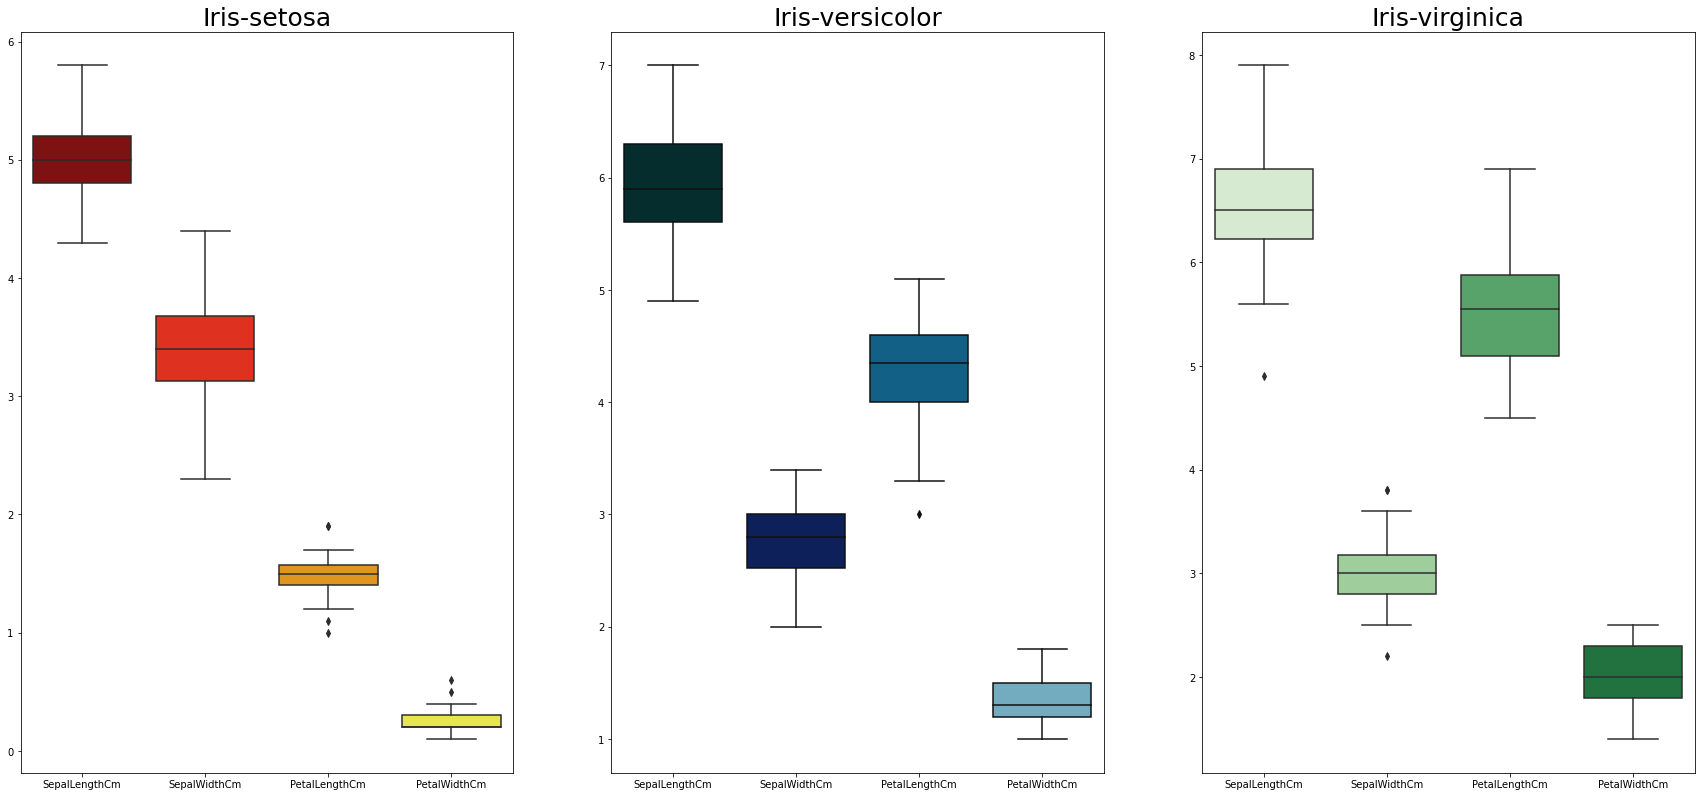

In [34]:
plt.figure(figsize = (30,30))
plt.subplot(2,3,1)
plt.title('Iris-setosa', fontsize = 25)
sns.boxplot(data = iris_setosa, palette = 'hot')

plt.subplot(2,3,2)
plt.title('Iris-versicolor', fontsize = 25)
sns.boxplot(data = iris_versicolor, palette = 'ocean')

plt.subplot(2,3,3)
plt.title('Iris-virginica', fontsize = 25)
sns.boxplot(data = iris_virginica, palette = 'Greens')

### Iris-setosa:
1. There are outliers for Petal Length and Petal Width, so not sure about the petal growth of this species.
2. The sepal length median is the maximum amongst all features.
3. Some values of sepal length seem to be overlapping the sepal width, which can mean some cases of this species have the same sepal length and sepal width.
4. The petal growth is much slower when compared to the sepal growth of this species.

### Iris-versicolor:
1. There are outliers for petal length.
2. The median of petal breadth is far less than that of petal length, so this species has less broadness.
3. The median of sepal breadth is far less than that of sepal length, so this species has less broadness.
4. There are more flowers having longer sepals than petals in this species of flower.

### Iris-virginica
1. There are outliers in sepal length and sepal width, so there might be an improper growth pattern for these.
2. More than half of flowers have equal sepal length and petal length.
3. The median of the petal length is much higher than that of petal breadth, so this species has less broadness.
4. The median of the sepal length is much higher than that of sepal breadth, so this species has less broadness.

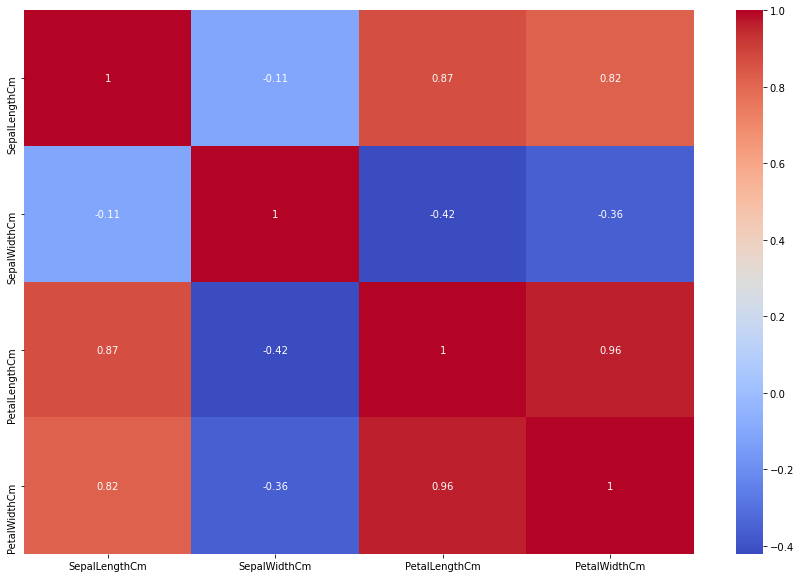

In [57]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

1. The strongest correlation exists between petal width and petal length. 
2. There seems to be no correlation between sepal length and sepal width, which means these two features are almost independant.


In [65]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score


In [69]:
x = df.drop('Species', axis = 1)
y = df['Species']

In [70]:
x_train, y_train, x_test, y_test = train_test_split(x,y,test_size=0.4, random_state = 5)


### Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x,y)
y_pred = logreg.predict(x)
print('The accuracy of the Logistic Regression is: {}'.format(metrics.accuracy_score(y,y_pred)))

The accuracy of the Logistic Regression is: 0.9733333333333334
